# Load financial data

In [1]:
import pandas as pd
import numpy as np
# data for Eurex futures are in this store
store = pd.HDFStore('/data/data/QH/L1.h5', 'r')
# do estimation using one month of data
asset_dax = 'xFDAX'
asset_sxe = 'xFSXE'
days = pd.bdate_range(start='20140101', end='20140103')

In [2]:
def PriceMove(df):
    return (df.PriceMove != 0).values

def GetOrderPrice(df):
    """ Given df representing one day of data, returns list of array representing
        order book values for mid-price moves (ask/bid), number of market orders 
        (ask/bid), number of limit order (ask/bid), number of cancel orders (ask/bid)"""
    
    out = []
    out += [np.copy(df.loc[PriceMove(df), "Time"].values)]
    mid_price = 0.5 * (np.copy(df.loc[PriceMove(df), "AskPriceAfter"].values) 
                       + np.copy(df.loc[PriceMove(df), "BidPriceAfter"].values))
    out += [mid_price]
    return out

In [3]:
big_data = []
for d in days:
    try:
        df_dax = store.get('%s/%s' %(asset_dax, d.strftime('%Y%m%d')))
        df_sxe = store.get('%s/%s' %(asset_sxe, d.strftime('%Y%m%d')))
    except KeyError:
        continue
    data = GetOrderPrice(df_dax) + GetOrderPrice(df_sxe)
    big_data.append(data)

# Lead-Lag estimator

In [5]:
from nphc.misc.lead_lag import hayashi_yoshida_cross_corr

In [6]:
data = big_data[0]
times_dax = data[0]
values_dax = data[1]
times_sxe = data[2]
values_sxe = data[3]
lag_range = np.linspace(-5,5,1000)
cross_corr = [ hayashi_yoshida_cross_corr(times_dax, values_dax, times_sxe, values_sxe, lag=lag) for lag in lag_range ]

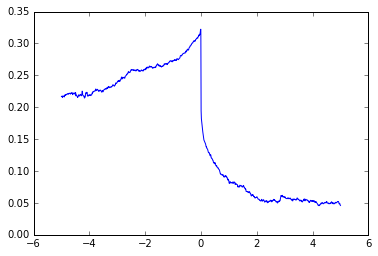

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(lag_range, cross_corr)